In [207]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc 

%matplotlib inline



In [208]:
eeg_df=pd.read_csv(r"D:\matlab\ymaps_code\data\20240209\data_20240209164956.csv")


In [209]:
emg_df=pd.read_csv(r"D:\matlab\ymaps_code\data\muscle_state.csv")

In [210]:
emg_df.head()

,0
0,0
1,0
2,0
3,0
4,0


In [211]:
eeg_df.columns=['e1','e2','e3','t7','c3','c4','t8']

In [212]:
eeg1=eeg_df.loc[:,["t7"]]
eeg2=eeg_df.loc[:,["c3"]]
eeg3=eeg_df.loc[:,["c4"]]
eeg4=eeg_df.loc[:,["t8"]]


In [213]:
s_f=len(eeg1)/120
t_f=1/s_f
T=np.arange(0,120,t_f)

In [214]:
len(T)

21345

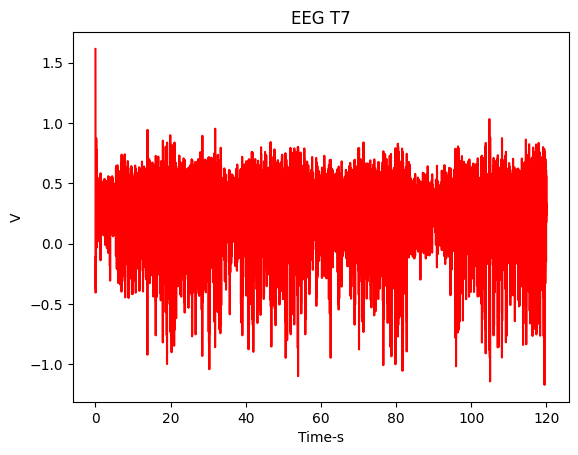

In [215]:
plt.Figure(figsize= (10,8))
plt.plot(T,eeg1,'r')
plt.ylabel('V')
plt.xlabel('Time-s')
plt.title('EEG T7')
plt.show()

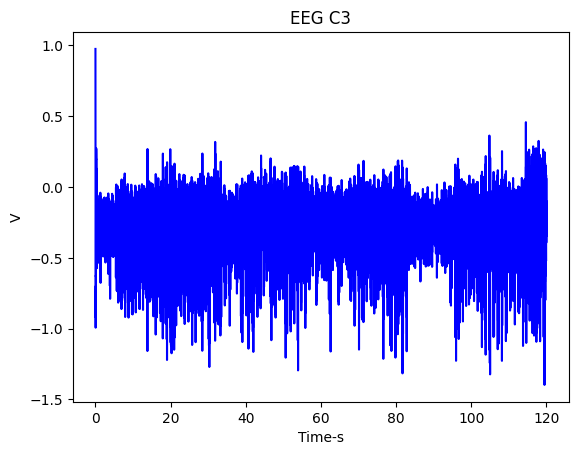

In [216]:
plt.Figure(figsize= (10,8))
plt.plot(T,eeg2,'b')
plt.ylabel('V')
plt.xlabel('Time-s')
plt.title('EEG C3')
plt.show()

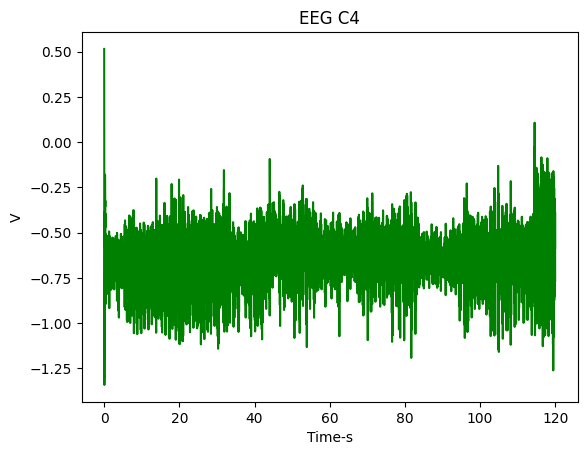

In [217]:
plt.Figure(figsize= (10,8))
plt.plot(T,eeg3,'g')
plt.ylabel('V')
plt.xlabel('Time-s')
plt.title('EEG C4')
plt.show()

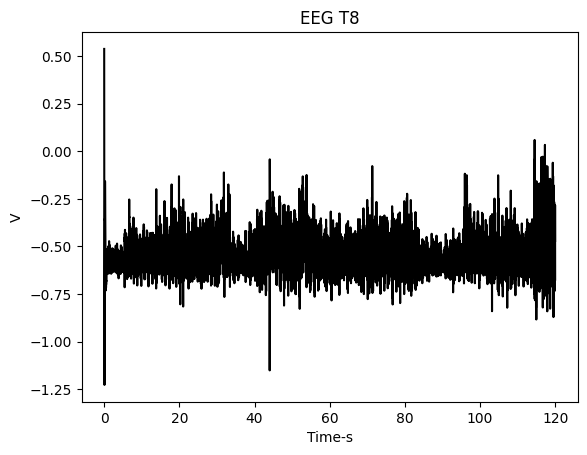

In [218]:
plt.Figure(figsize= (10,8))
plt.plot(T,eeg4,'k')
plt.ylabel('V')
plt.xlabel('Time-s')
plt.title('EEG T8')
plt.show()

In [219]:
E1=np.fft.fft(eeg1)
E2=np.fft.fft(eeg2)
E3=np.fft.fft(eeg3)
E4=np.fft.fft(eeg4)



In [220]:
N=np.arange(len(E1))
T_f=len(E1)/s_f
freq=N/T_f

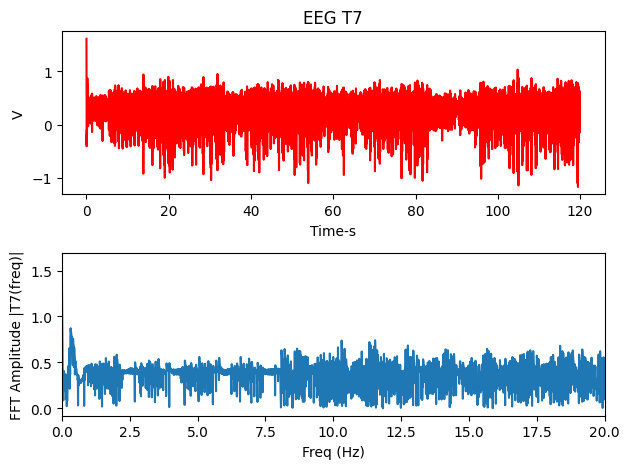

In [221]:

plt.Figure(facecolor='#94F008')
plt.subplot(211)

plt.plot(T,eeg1,'r')
plt.ylabel('V')
plt.xlabel('Time-s')
plt.title('EEG T7')


plt.subplot(212)

plt.plot(freq, np.abs(E1), '')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |T7(freq)|')
plt.xlim(0, 20)
plt.tight_layout()
plt.show()



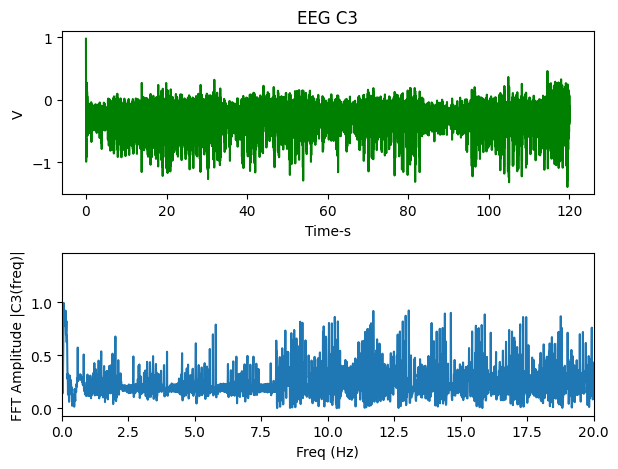

In [222]:
plt.Figure(facecolor='#94F008')
plt.subplot(211)

plt.plot(T,eeg2,'g')
plt.ylabel('V')
plt.xlabel('Time-s')
plt.title('EEG C3')


plt.subplot(212)

plt.plot(freq, np.abs(E2), '')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |C3(freq)|')
plt.xlim(0, 20)
plt.tight_layout()
plt.show()


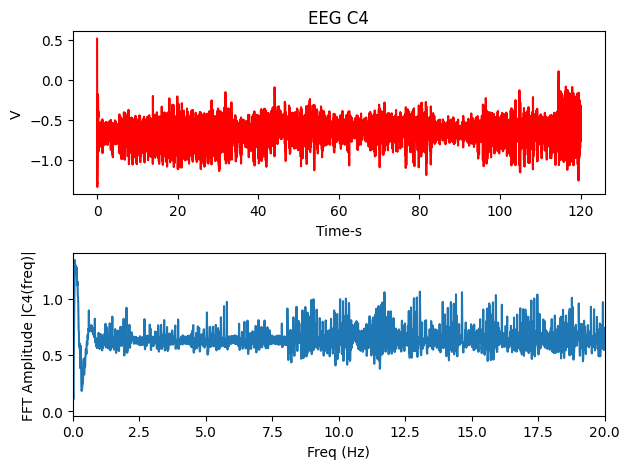

In [223]:
plt.Figure(facecolor='#94F008')
plt.subplot(211)

plt.plot(T,eeg3,'r')
plt.ylabel('V')
plt.xlabel('Time-s')
plt.title('EEG C4')


plt.subplot(212)

plt.plot(freq, np.abs(E3), '')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |C4(freq)|')
plt.xlim(0, 20)
plt.tight_layout()
plt.show()


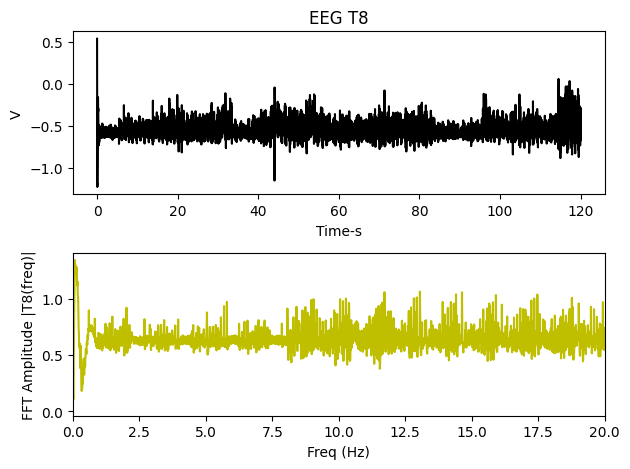

In [224]:
plt.Figure(facecolor='#94F008')
plt.subplot(211)

plt.plot(T,eeg4,'k')
plt.ylabel('V')
plt.xlabel('Time-s')
plt.title('EEG T8')


plt.subplot(212)

plt.plot(freq, np.abs(E3), 'y')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |T8(freq)|')
plt.xlim(0, 20)
plt.tight_layout()
plt.show()


In [243]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
rng = np.random.default_rng()
eeg1_=eeg1.to_numpy()
eeg1_=eeg1_.reshape(21345,)


In [280]:
eeg2_=eeg2.to_numpy().reshape(21345,)
eeg3_=eeg3.to_numpy().reshape(21345,)
eeg4_=eeg4.to_numpy().reshape(21345,)

In [262]:
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

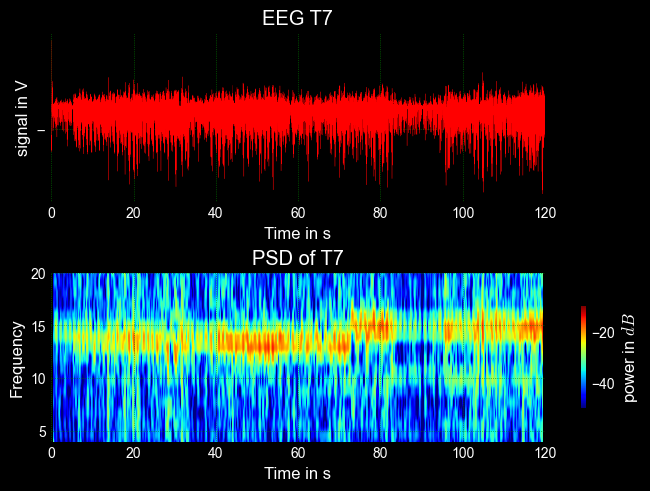

In [283]:

plt.style.use('dark_background')
fig,(ax1,ax2) =plt.subplots(nrows=2,layout='constrained')


ax1.plot(T,eeg1,'red','--',linewidth=0.2)

ax1.set_ylabel('signal in V')
ax1.set_xlabel('Time in s')
ax1.set_xlim(-0.1,120)
#plt.xlabel('Time-s')

ax1.set_title('EEG T7')
ax1.grid(linewidth=0.5,linestyle=':',color='green')
Pxx,fxx,t,im=ax2.specgram(eeg1_,NFFT=170,Fs=s_f,mode='psd',scale='dB',
                          noverlap=158,cmap='jet'
                          ,vmin=-50)
ax2.set_ylim(4,20)
ax2.set_xlim(-0.10,120)
fig.colorbar(im,shrink=0.6).set_label('power in '+r'$dB$')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Time in s')
ax2.set_title('PSD of T7')
ax2.grid(linewidth=0.5,linestyle=':',color='green')
plt.show()


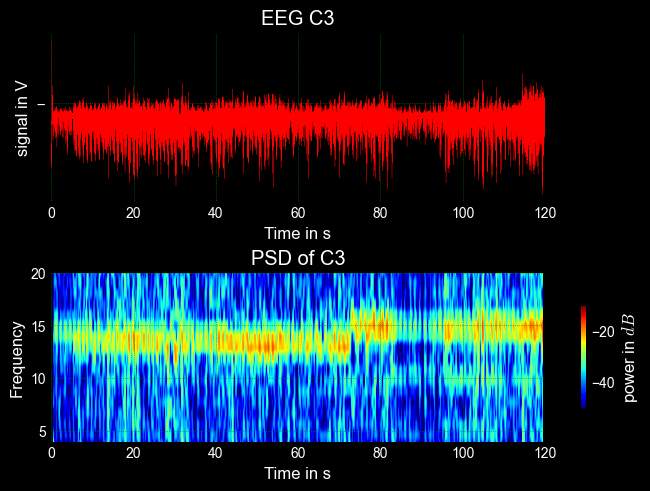

In [281]:
plt.style.use('dark_background')
fig,(ax1,ax2) =plt.subplots(nrows=2,layout='constrained')


ax1.plot(T,eeg2_,'red','--',linewidth=0.2)

ax1.set_ylabel('signal in V')
ax1.set_xlabel('Time in s')
ax1.set_xlim(-0.1,120)
#plt.xlabel('Time-s')

ax1.set_title('EEG C3')
ax1.grid(linewidth=0.5,linestyle=':',color='green')
Pxx,fxx,t,im=ax2.specgram(eeg2_,NFFT=170,Fs=s_f,mode='psd',scale='dB',
                          noverlap=158,cmap='jet'
                          ,vmin=-50)
ax2.set_ylim(4,20)
ax2.set_xlim(-0.10,120)
fig.colorbar(im,shrink=0.6).set_label('power in '+r'$dB$')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Time in s')
ax2.set_title('PSD of C3')
ax2.grid(linewidth=0.5,linestyle=':',color='green')
plt.show()

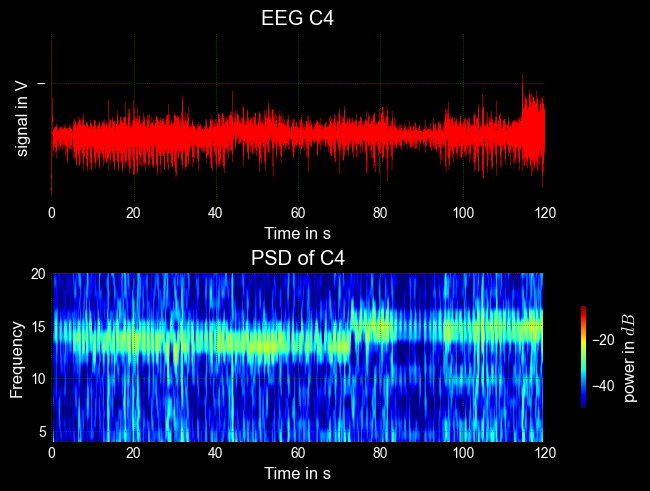

In [282]:
plt.style.use('dark_background')
fig,(ax1,ax2) =plt.subplots(nrows=2,layout='constrained')


ax1.plot(T,eeg3_,'red','--',linewidth=0.2)

ax1.set_ylabel('signal in V')
ax1.set_xlabel('Time in s')
ax1.set_xlim(-0.1,120)
#plt.xlabel('Time-s')

ax1.set_title('EEG C4')
ax1.grid(linewidth=0.5,linestyle=':',color='green')
Pxx,fxx,t,im=ax2.specgram(eeg3_,NFFT=170,Fs=s_f,mode='psd',scale='dB',
                          noverlap=158,cmap='jet'
                          ,vmin=-50)
ax2.set_ylim(4,20)
ax2.set_xlim(-0.10,120)
fig.colorbar(im,shrink=0.6).set_label('power in '+r'$dB$')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Time in s')
ax2.set_title('PSD of C4')
ax2.grid(linewidth=0.5,linestyle=':',color='green')
plt.show()

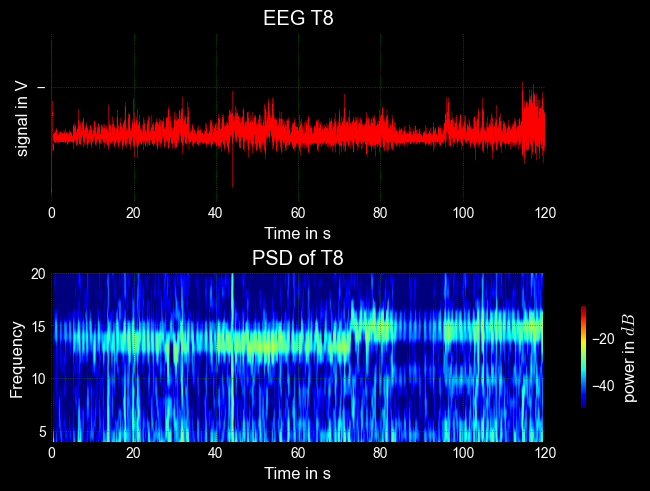

In [286]:
plt.style.use('dark_background')
fig,(ax1,ax2) =plt.subplots(nrows=2,layout='constrained')


ax1.plot(T,eeg4_,'red','--',linewidth=0.2)

ax1.set_ylabel('signal in V')
ax1.set_xlabel('Time in s')
ax1.set_xlim(-0.1,120)
#plt.xlabel('Time-s')

ax1.set_title('EEG T8')
ax1.grid(linewidth=0.5,linestyle=':',color='green')
Pxx,fxx,t,im=ax2.specgram(eeg4_,NFFT=170,Fs=s_f,mode='psd',scale='dB',
                          noverlap=158,cmap='jet'
                          ,vmin=-50)
ax2.set_ylim(4,20)
ax2.set_xlim(-0.10,120)
fig.colorbar(im,shrink=0.6).set_label('power in '+r'$dB$')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Time in s')
ax2.set_title('PSD of T8')
ax2.grid(linewidth=0.5,linestyle=':',color='green')
plt.show()

In [1]:
import analyse_csv as csv


In [42]:
import numpy as np

X_train = np.random.random((300*120, 4))
y_train = np.random.random((300*120, 6))

In [46]:
from keras import models
from keras import layers

INPUT_DIM = X_train.shape[1]

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_dim=INPUT_DIM))
# model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                80        
                                                                 
 dense_37 (Dense)            (None, 64)                1088      
                                                                 
 dense_38 (Dense)            (None, 6)                 390       
                                                                 
Total params: 1558 (6.09 KB)
Trainable params: 1558 (6.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [50]:
X_test= np.random.random((300, 4))
Y_test= np.random.random((300, 6))

In [48]:
model.fit(X_train, y_train, 
          batch_size=128, 
          epochs=100)

Epoch 1/100
282/282 [==============================] - 2s 3ms/step - loss: 7.1898 - accuracy: 0.1678
Epoch 2/100
282/282 [==============================] - 1s 3ms/step - loss: 17.5560 - accuracy: 0.1678
Epoch 3/100
282/282 [==============================] - 1s 3ms/step - loss: 30.0793 - accuracy: 0.1663
Epoch 4/100
282/282 [==============================] - 1s 4ms/step - loss: 28.3658 - accuracy: 0.1625
Epoch 5/100
282/282 [==============================] - 1s 3ms/step - loss: 7.2652 - accuracy: 0.1670
Epoch 6/100
282/282 [==============================] - 1s 4ms/step - loss: 7.4691 - accuracy: 0.1670
Epoch 7/100
282/282 [==============================] - 1s 2ms/step - loss: 16.6971 - accuracy: 0.1698
Epoch 8/100
282/282 [==============================] - 1s 3ms/step - loss: 25.1099 - accuracy: 0.1668
Epoch 9/100
282/282 [==============================] - 1s 3ms/step - loss: 30.8196 - accuracy: 0.1698
Epoch 10/100
282/282 [==============================] - 1s 2ms/step - loss: 43.3033 -

In [55]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 2583.034912109375
Test accuracy: 0.1666666716337204
1/1 [==============================] - 0s 121ms/step


array([[0., 0., 0., 1., 0., 0.]], dtype=float32)

In [17]:
pip install livelossplot

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
   - -------------------------------------- 0.2/6.8 MB 5.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/6.8 MB 5.6 MB/s eta 0:00:02
   ---- ----------------------------------- 0.7/6.8 MB 5.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/6.8 MB 5.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.0/6.8 MB 4.4 MB/s eta 0:00:02
   ------- -------------------------------- 1.3/6.8 MB 4.8 MB/s eta 0:00:02
   -------- ------------------------------- 1.5/6.8 MB 4.7 MB/s eta 0:00:02
   ---------- ----------------------------- 1.7/6.8 MB 4.6 MB/s eta 0:00:02
   ----------- ---------------------------- 1.9/6.8 MB 4.5 MB/s eta 0:00:02
   ------------ --------------------------- 2.2/6.8 MB 4.6 MB/s eta 0:00:02
   -------------- ------------------------- 2.4/6.8 MB 4.7 MB/s eta 0:00:01
   --------------

In [18]:
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
# from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

import livelossplot
plot_losses = livelossplot.PlotLossesKeras()
NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

def data_summary(X_train, y_train, X_test, y_test):
    
    """Summarize current state of dataset"""
    print('Train images shape:', X_train.shape)
    print('Train labels shape:', y_train.shape)
    print('Test images shape:', X_test.shape)
    print('Test labels shape:', y_test.shape)
    print('Train labels:', y_train)
    print('Test labels:', y_test)
    
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Train labels: [5 0 4 ... 5 6 8]
Test labels: [7 2 1 ... 4 5 6]


In [19]:
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255



In [20]:
# Categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)
Train labels: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [22]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


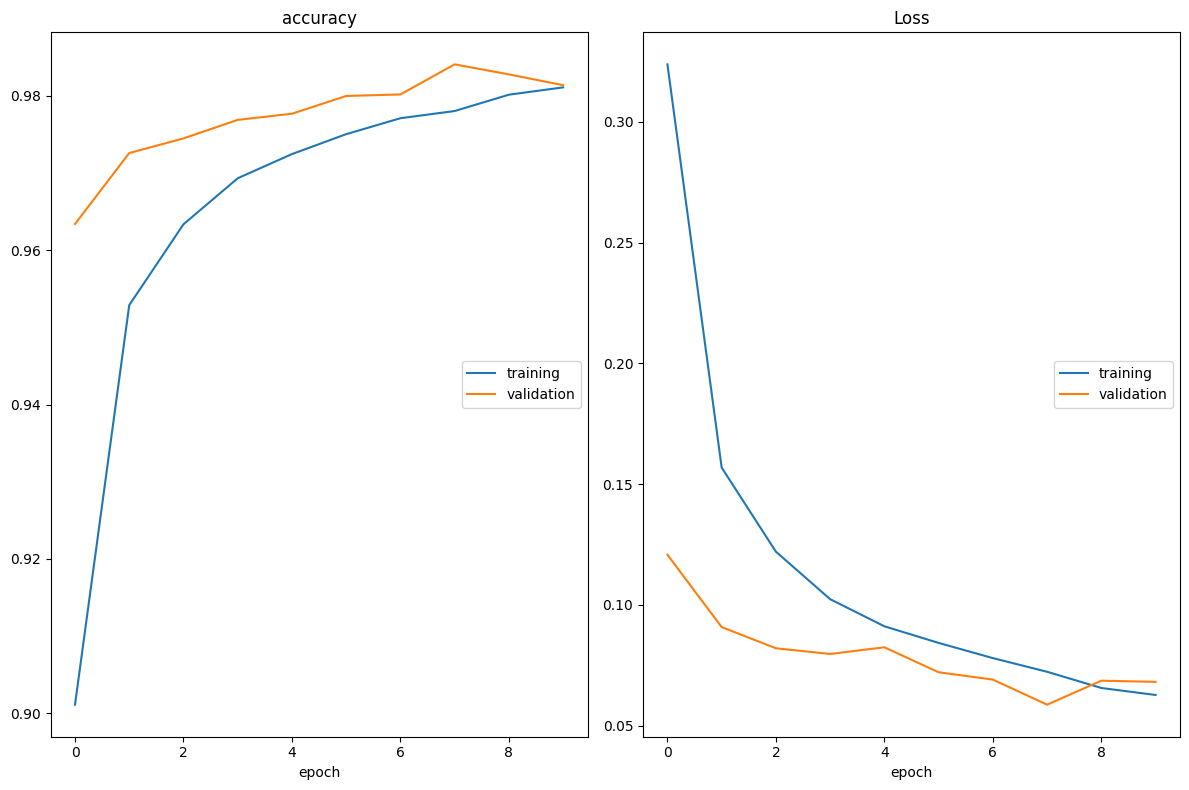

accuracy
	training         	 (min:    0.901, max:    0.981, cur:    0.981)
	validation       	 (min:    0.963, max:    0.984, cur:    0.981)
Loss
	training         	 (min:    0.063, max:    0.324, cur:    0.063)
	validation       	 (min:    0.059, max:    0.121, cur:    0.068)
469/469 [==============================] - 12s 25ms/step - loss: 0.0627 - accuracy: 0.9811 - val_loss: 0.0682 - val_accuracy: 0.9814


In [23]:
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_test, y_test))

In [1]:
import numpy as np

strd= '[0.1,0.2,0.3,0.4]'

s=str(strd.split(',')).replace("[","").replace("]","").replace("'","").replace(" ","")
ss=str(strd.strip().split(',')).replace("[","").replace("]","").replace("'","").replace(" ","")
a=np.fromstring(ss,dtype=float,sep=',').reshape(4,1)

print(a[0])


[0.1]


In [9]:
import ttkbootstrap as ttkb
from ttkbootstrap.constants import *

app = ttkb.Window(size=(500, 500))

gauge = ttkb.Floodgauge(
    bootstyle=INFO,
    font=(None, 24, 'bold'),
    mask='Memory Used {}%',
)
gauge.pack(fill=BOTH, expand=YES, padx=10, pady=10)

# autoincrement the gauge
gauge.start()

# stop the autoincrement
# gauge.stop()

# manually update the gauge value
gauge.configure(value=25)

# increment the value by 10 steps
gauge.step(10)

app.mainloop()


TclError: Layout Horizontal.info.Horizontal.TFloodgauge not found

In [2]:
pip install ttkbootstrap

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/133.0 kB ? eta -:--:--
   ------------ -------------------------- 41.0/133.0 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 133.0/133.0 kB 1.3 MB/s eta 0:00:00
